# QISKit example: Ripple adder
Based on Cuccaro, Draper, Kutin & Moulton (2008).

* Gines Carrascal, Complutense University of Madrid

https://github.com/gines-carrascal/jupyter-qiskit

In [1]:
from qiskit import ClassicalRegister, QuantumRegister
from qiskit import QuantumCircuit
from qiskit import execute
from qiskit import Aer

import qiskit.tools.jupyter

In [2]:
sumando_1 = input("Primer sumando en binario (4 bits)")
sumando_2 = input("Segundo sumando en binario(4 bits)")

Primer sumando en binario (4 bits)0001
Segundo sumando en binario(4 bits)0001


In [3]:
n = 4

a = QuantumRegister(n,"a")
b = QuantumRegister(n+1, "b")
c = QuantumRegister(1, "c")
resultado = ClassicalRegister(n+1, "result")

qc = QuantumCircuit(a,b,c,resultado)

for i in range(n):
    if sumando_1[i] == "1":
        qc.x(a[n - (i+1)])
for i in range(n):
    if sumando_2[i] == "1":
        qc.x(b[n - (i+1)])

for i in range(1, n):
    qc.cx(a[i], b[i])

qc.cx(a[1], c[0])

qc.ccx(a[0], b[0], c[0])
qc.cx(a[2], a[1])

qc.ccx(c[0], b[1], a[1])
qc.cx(a[3], a[2])

for i in range(2, n-2):
    qc.ccx(a[i-1], b[i], a[i])
    qc.cx(a[i+2], a[i+1])

qc.ccx(a[n-3], b[n-2], a[n-2])
qc.cx(a[n-1], b[n])

qc.ccx(a[n-2], b[n-1], b[n])
for i in range(1, n-1):
    qc.x(b[i])

qc.cx(c[0], b[1])
for i in range(2, n):
    qc.cx(a[i-1], b[i])

qc.ccx(a[n-3], b[n-2], a[n-2])

for i in range(n-3,1,-1):
    qc.ccx(a[i-1], b[i], a[i])
    qc.cx(a[i+2], a[i+1])
    qc.x(b[i+1])

qc.ccx(c[0], b[1], a[1])
qc.cx(a[3], a[2])
qc.x(b[2])

qc.ccx(a[0], b[0], c[0])
qc.cx(a[2], a[1])
qc.x(b[1])

qc.cx(a[1], c[0])

for i in range(n):
    qc.cx(a[i], b[i])

qc.measure(b,resultado)    

In [4]:
%circuit_library_info qc

In [5]:
from qiskit import IBMQ, transpile
pro = IBMQ.load_account()
backend = pro.get_backend("ibmq_16_melbourne")

In [ ]:
sc_circ = transpile(qc,backend)

In [7]:
%circuit_library_info sc_circ

Adding barriers for easiest understanding:

In [8]:
n = 4

a = QuantumRegister(n,"a")
b = QuantumRegister(n+1, "b")
c = QuantumRegister(1, "c")
resultado = ClassicalRegister(n+1, "result")

qc = QuantumCircuit(a,b,c,resultado)

for i in range(n):
    if sumando_1[i] == "1":
        qc.x(a[n - (i+1)])
for i in range(n):
    if sumando_2[i] == "1":
        qc.x(b[n - (i+1)])

qc.barrier(a,b,c)
for i in range(1, n):
    qc.cx(a[i], b[i])
qc.barrier(a,b,c)
qc.cx(a[1], c[0])
qc.barrier(a,b,c)
qc.ccx(a[0], b[0], c[0])
qc.cx(a[2], a[1])
qc.barrier(a,b,c)
qc.ccx(c[0], b[1], a[1])
qc.cx(a[3], a[2])
qc.barrier(a,b,c)
for i in range(2, n-2):
    qc.ccx(a[i-1], b[i], a[i])
    qc.cx(a[i+2], a[i+1])
    qc.barrier(a,b,c)
qc.ccx(a[n-3], b[n-2], a[n-2])
qc.cx(a[n-1], b[n])
qc.barrier(a,b,c)
qc.ccx(a[n-2], b[n-1], b[n])
for i in range(1, n-1):
    qc.x(b[i])
qc.barrier(a,b,c)
qc.cx(c[0], b[1])
for i in range(2, n):
    qc.cx(a[i-1], b[i])
qc.barrier(a,b,c)
qc.ccx(a[n-3], b[n-2], a[n-2])
qc.barrier(a,b,c)
for i in range(n-3,1,-1):
    qc.ccx(a[i-1], b[i], a[i])
    qc.cx(a[i+2], a[i+1])
    qc.x(b[i+1])
    qc.barrier(a,b,c)
qc.ccx(c[0], b[1], a[1])
qc.cx(a[3], a[2])
qc.x(b[2])
qc.barrier(a,b,c)
qc.ccx(a[0], b[0], c[0])
qc.cx(a[2], a[1])
qc.x(b[1])
qc.barrier(a,b,c)
qc.cx(a[1], c[0])
qc.barrier(a,b,c)
for i in range(n):
    qc.cx(a[i], b[i])
qc.barrier(a,b,c)
qc.measure(b,resultado)    

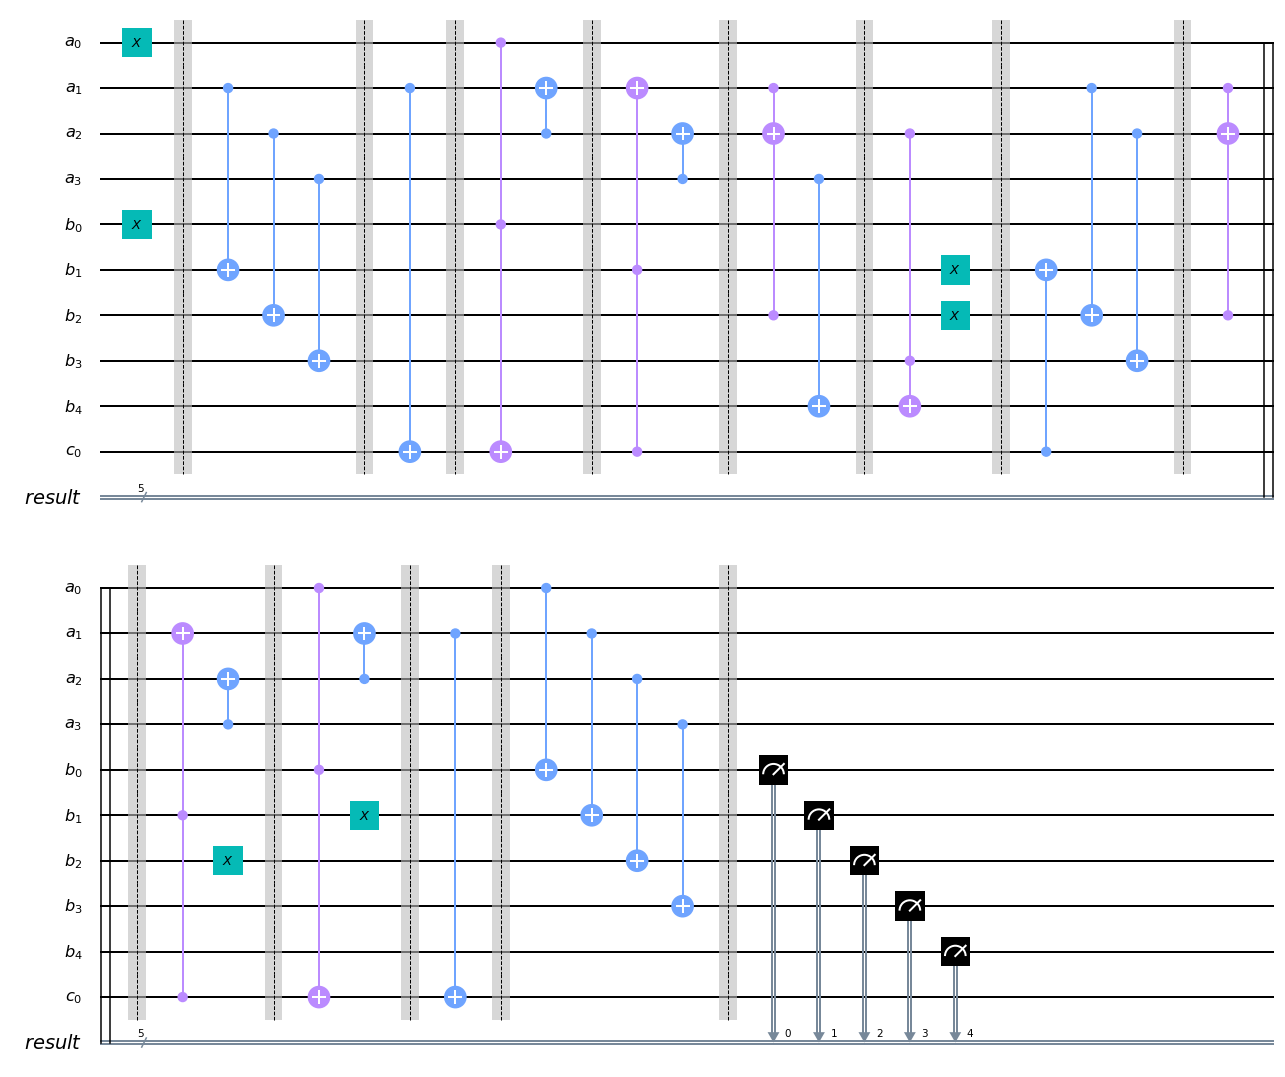

In [9]:
qc.draw(output='mpl')

In [10]:
my_backend = Aer.get_backend("qasm_simulator")  
job = execute(qc, my_backend, shots=20)
job_stats = job.result().get_counts()
print(job_stats) 

{'00010': 20}


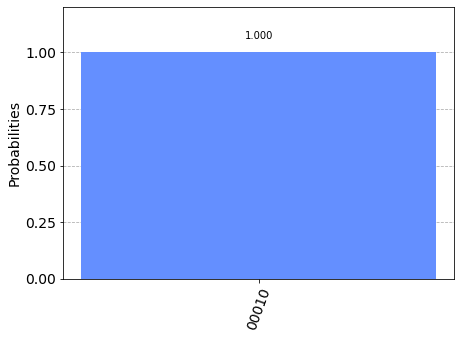

In [11]:
from qiskit.visualization import plot_histogram


# Run in interactive mode
plot_histogram(job_stats)

In [12]:
%qiskit_version_table